<a href="https://colab.research.google.com/github/MylavarapuSaketh/Saketh_INFO5731_Fall2023/blob/main/Saketh_Mylavarapu_INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
# Write your code here
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [2]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [624 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,010 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,203 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:13 http://

In [3]:
# Importing necessary modules from the Selenium library
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By

# Importing pandas for data manipulation
import pandas as pd

# Importing the time module
import time

# Setting up ChromeOptions to configure the Chrome WebDriver
options = webdriver.ChromeOptions()

# Setting the headless mode, which allows running the browser without a GUI
options.add_argument('-headless')

# Disabling the sandbox mode for added security
options.add_argument('-no-sandbox')

# Disabling the /dev/shm usage to avoid WebDriver failures in certain environments
options.add_argument('-disable-dev-shm-usage')


In [4]:
reviews=pd.read_csv('/content/RRR_reviews1.csv')
print(reviews)

                                                Review
0    I have seen a lot of movies in my time, made i...
1    I bet you'd never think the mash-up the heavy-...
2    I have to try and review this without comparin...
3    There is officially ZERO reason to watch Gray ...
4    When I pushed play, I did not really believe t...
..                                                 ...
114  The action scenes were just as badass. It's so...
115  This might be uncultured, but I usually strugg...
116  We watched the Oscar show last week and witnes...
117  If Magadheera, Eega and the Baahubali movies w...
118  This movie is one of the greatest movies I've ...

[119 rows x 1 columns]


In [5]:
# Print the column names to identify the correct one
print(reviews.columns)

# 1 Lower Case
reviews['After Converting to lower case'] = reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# 2 Punctuation Removal
reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]', '')

# 3 Special Characters Removal
import re
reviews['After Removing Special Characters'] = reviews['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', char) for char in x))

# 4 Stopwords Removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['After Removing Stopwords'] = reviews['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# 5 Spelling Correction
from textblob import TextBlob
reviews['After Spelling Correction'] = reviews['After Removing Stopwords'].apply(lambda x: str(TextBlob(x).correct()))

# 6 Tokenization
import nltk
nltk.download('punkt')
reviews['After Tokenization'] = reviews['After Spelling Correction'].apply(lambda x: TextBlob(x).words)

# 7 Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
reviews['After Stemming'] = reviews['After Tokenization'].apply(lambda x: " ".join([ps.stem(word) for word in x]))

# 8 Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
reviews['After Lemmatization'] = reviews['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

reviews.to_csv('reviews_processed.csv', index=False)
reviews

Index(['Review'], dtype='object')


<ipython-input-5-0e640109c1ce>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]', '')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,After Converting to lower case,After Removing Punctuation,After Removing Special Characters,After Removing Stopwords,After Spelling Correction,After Tokenization,After Stemming,After Lemmatization
0,"I have seen a lot of movies in my time, made i...","i have seen a lot of movies in my time, made i...",i have seen a lot of movies in my time made in...,i have seen a lot of movies in my time made in...,seen lot movies time made lot different styles...,seen lot moves time made lot different style d...,"[seen, lot, moves, time, made, lot, different,...",seen lot move time made lot differ style diffe...,seen lot move time made lot differ style diffe...
1,I bet you'd never think the mash-up the heavy-...,i bet you'd never think the mash-up the heavy-...,i bet youd never think the mashup the heavyhan...,i bet youd never think the mashup the heavyhan...,bet youd never think mashup heavyhanded rambo ...,bet you never think masha heavyhanded ratio my...,"[bet, you, never, think, masha, heavyhanded, r...",bet you never think masha heavyhand ratio myst...,bet you never think masha heavyhand ratio myst...
2,I have to try and review this without comparin...,i have to try and review this without comparin...,i have to try and review this without comparin...,i have to try and review this without comparin...,try review without comparing anything directly...,try review without comparing anything directly...,"[try, review, without, comparing, anything, di...",tri review without compar anyth directli reall...,tri review without compar anyth directli reall...
3,There is officially ZERO reason to watch Gray ...,there is officially zero reason to watch gray ...,there is officially zero reason to watch gray ...,there is officially zero reason to watch gray ...,officially zero reason watch gray man notsosem...,officially zero reason watch gray man notsosem...,"[officially, zero, reason, watch, gray, man, n...",offici zero reason watch gray man notsosemisub...,offici zero reason watch gray man notsosemisub...
4,"When I pushed play, I did not really believe t...","when i pushed play, i did not really believe t...",when i pushed play i did not really believe th...,when i pushed play i did not really believe th...,pushed play really believe would ever watch wh...,pushed play really believe would ever watch wh...,"[pushed, play, really, believe, would, ever, w...",push play realli believ would ever watch whole...,push play realli believ would ever watch whole...
...,...,...,...,...,...,...,...,...,...
114,The action scenes were just as badass. It's so...,the action scenes were just as badass. it's so...,the action scenes were just as badass its so h...,the action scenes were just as badass its so h...,action scenes badass hilariously ridiculous st...,action scenes adams hilariously ridiculous stu...,"[action, scenes, adams, hilariously, ridiculou...",action scene adam hilari ridicul stupid love b...,action scene adam hilari ridicul stupid love b...
115,"This might be uncultured, but I usually strugg...","this might be uncultured, but i usually strugg...",this might be uncultured but i usually struggl...,this might be uncultured but i usually struggl...,might uncultured usually struggle watch films ...,might cultured usually struggle watch films su...,"[might, cultured, usually, struggle, watch, fi...",might cultur usual struggl watch film submit d...,might cultur usual struggl watch film submit d...
116,We watched the Oscar show last week and witnes...,we watched the oscar show last week and witnes...,we watched the oscar show last week and witnes...,we watched the oscar show last week and witnes...,watched oscar show last week witnessed perform...,watched oscar show last week witnessed perform...,"[watched, oscar, show, last, week, witnessed, ...",watch oscar show last week wit perform song er...,watch oscar show last week wit perform song er...
117,"If Magadheera, Eega and the Baahubali movies w...","if magadheera, eega and the baahubali movies w..

In [6]:
# Importing necessary modules
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

# Creating an empty list to store tokenized sentences
array = []

# Tokenizing each sentence in the 'After Lemmatization' column of the 'reviews' DataFrame
for i in reviews['After Lemmatization']:
    array.append(word_tokenize(i))

# Removing empty lists from the tokenized data
cleaned_data = [x for x in array if x != []]

# Flattening the list of tokenized sentences
repeat = list(itertools.chain.from_iterable(cleaned_data))

# Generating trigrams from the list of tokens
trigrams = nltk.trigrams(repeat)

# Calculating the frequency distribution of trigrams
FD = nltk.FreqDist(trigrams)

# FD contains the frequency distribution of trigrams


In [7]:
# Importing the Counter class from the collections module
from collections import Counter

# Generating bigrams from the list of tokens
bg = nltk.bigrams(repeat)

# Calculating the frequency distribution of bigrams
FD = nltk.FreqDist(bg)

# Converting the frequency distribution to a dictionary
bg_dict = dict(FD)

# Iterating through the bigram dictionary
for i in bg_dict:
    # Printing the bigram and its normalized frequency
    print(str(i) + ':' + str(bg_dict[i] / repeat.count(i[0])))


('seen', 'lot'):0.06097560975609756
('lot', 'move'):0.1
('move', 'time'):0.06944444444444445
('time', 'made'):0.06493506493506493
('made', 'lot'):0.11904761904761904
('lot', 'differ'):0.1
('differ', 'style'):0.35714285714285715
('style', 'differ'):0.5
('differ', 'geniu'):0.35714285714285715
('geniu', 'around'):0.38461538461538464
('around', 'world'):0.20833333333333334
('world', 'give'):0.5
('give', 'seen'):0.45901639344262296
('seen', 'everyth'):0.06097560975609756
('everyth', 'mainstream'):0.2
('mainstream', 'movi'):1.0
('movi', 'imagin'):0.017543859649122806
('imagin', 'experiment'):0.3333333333333333
('experiment', 'can'):1.0
('can', 'even'):0.15625
('even', 'rememb'):0.07352941176470588
('rememb', 'last'):1.0
('last', 'time'):0.2631578947368421
('time', 'came'):0.06493506493506493
('came', 'away'):0.38461538461538464
('away', 'movi'):0.11627906976744186
('movi', 'think'):0.03508771929824561
('think', 'id'):0.10869565217391304
('id', 'never'):0.2631578947368421
('never', 'seen'):0.

In [8]:
# Initializing variables
complete_data = ''  # Variable to store concatenated lemmatized data
j = []  # List to store 'Review-' prefixed strings
count = 1  # Counter variable for review numbering

# Concatenating lemmatized data and creating 'Review-' strings
for i in reviews['After Lemmatization']:
    complete_data = complete_data + i
    k = 'Review-' + str(count)
    j.append(k)
    count += 1

# Importing necessary library
from textblob import TextBlob

# Initializing lists to store noun phrases and their frequencies
np = []  # List to store individual noun phrases
fcy = []  # List to store frequency data for each noun phrase

# Extracting noun phrases and their frequencies
for i in reviews['After Lemmatization']:
    blob = TextBlob(i)
    for nouns in blob.noun_phrases:
        np.append(nouns)

# Calculating the frequency of each noun phrase in each review
for w in np:
    npf = []
    for i in reviews['After Lemmatization']:
        npf.append(i.count(w) / complete_data.count(w))
    fcy.append(npf)

# Creating a DataFrame with the frequency data
noun_phrases_Data = pd.DataFrame(fcy).T
noun_phrases_Data.columns = list(np)
noun_phrases_Data.j = j
noun_phrases_Data


<ipython-input-8-641c72f784f6>:36: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  noun_phrases_Data.j = j


,lot differ style differ geniu,everyth mainstream movi imagin experiment,rrrthi movi,wife nearli,minut mark film top ridicul,hook total,point disappoint hour behemoth end,musclebound slickedup men fight tiger check,public flog,music number,...,grand err reinstat fact rajamouli undisput king period action drama india filmmak lot,leav seat end otherwis,import part cinema,dont need,book ticket,actual execut,part movi scene movi,movi scene ridicul funni stupid,realiz good movi,note hollywood movi top major
0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.2,0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [9]:
# Write your code here
# Importing the 'math' module
import math

# Extracting sentences from the 'After Spelling Correction' column
sentences = reviews["After Spelling Correction"].values.tolist()

# Creating a set of unique words from all sentences
words = set([j for i in sentences for j in i.split(" ")])

# Creating a DataFrame to store TF-IDF values for each word in each review
tf_idf_df = pd.DataFrame(words, columns=["words"])
count = 1  # Counter variable for review numbering

# Function to calculate TF-IDF value for a word in a sentence
def tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0

# Iterating through each sentence and calculating TF-IDF values for each word
for sentence in sentences:
    tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
    count += 1

# Displaying the DataFrame with TF-IDF values
tf_idf_df






<ipython-input-9-6be0b555a5a4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
<ipython-input-9-6be0b555a5a4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
<ipython-input-9-6be0b555a5a4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review110,Review111,Review112,Review113,Review114,Review115,Review116,Review117,Review118,Review119
0,30,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.020158,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,pray,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,reason,0.000000,0.000000,0.011322,0.035026,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,experience,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.035859,0.011459,0.000000
4,rules,0.000000,0.000000,0.011322,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,hollywood,0.000000,0.000000,0.019692,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.021166,0.000000,0.032534
1526,musical,0.014585,0.018169,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1527,actions,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.021346,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1528,today,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.032534


In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

search_sentence="  Excellent movie, All the actors did a fabulous work."
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english')
X_set = {i for i in X_list if not i in stop_word}

def cv(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  list1 =[];list2 =[]
  for j in r_vector:
      if j in X_set: list1.append(1)
      else: list1.append(0)
      if j in Y_set: list2.append(1)
      else: list2.append(0)
  return r_vector, list1, list2

def cc(r_vector, l1, l2):
  count = 0
  for i in range(len(r_vector)):
        count+= list1[i]*list2[i]
  c = count / float((sum(list1)*sum(list2))**0.5)
  return c


list3 = []
for l in reviews['After Spelling Correction']:
  Y_list = word_tokenize(l)
  Y_set = {k for k in Y_list if not k in stop_word}
  r_vector, list1, list2 = cv(X_set, Y_set)
  try:
    similarity = cc(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  list3.append(similarity)
Data2 = pd.DataFrame(list(zip(reviews['Review'],list3)), columns=['Review','cosine cimilarity'])
Data2

,Review,cosine cimilarity
0,"I have seen a lot of movies in my time, made i...",0.033260
1,I bet you'd never think the mash-up the heavy-...,0.070360
2,I have to try and review this without comparin...,0.029463
3,There is officially ZERO reason to watch Gray ...,0.000000
4,"When I pushed play, I did not really believe t...",0.044194
...,...,...
114,The action scenes were just as badass. It's so...,0.144338
115,"This might be uncultured, but I usually strugg...",0.035898
116,We watched the Oscar show last week and witnes...,0.081111
117,"If Magadheera, Eega and the Baahubali movies w...",0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [11]:
# Write your code here
# Installing or upgrading the gensim library
!pip install --upgrade gensim

# Importing necessary modules from the gensim library
import gensim
from gensim import models
from gensim.models import Word2Vec

# Importing modules for data visualization
from sklearn.decomposition import PCA
from matplotlib import pyplot





In [12]:
# Extracting lemmatized sentences from the 'After Lemmatization' column
docs = [word.split() for word in reviews['After Lemmatization'] if str(word) != 'nan' and str(word) != '']

# Creating a Word2Vec model using the extracted sentences
model = models.Word2Vec(docs, vector_size=300)

# Extracting words from the model's vocabulary
words = list(model.wv.index_to_key)

# Printing the list of words
print(words)


['film', 'movi', 'action', 'err', 'one', 'scene', 'watch', 'rajamouli', 'good', 'make', 'also', 'like', 'two', 'stori', 'well', 'seen', 'ram', 'time', 'british', 'move', 'that', 'much', 'hero', 'never', 'even', 'would', 'look', 'set', 'long', 'everi', 'know', 'indian', 'been', 'give', 'come', 'dont', 'entertain', 'charact', 'hour', 'go', 'way', 'see', 'there', 'bahubali', 'best', 'charon', 'lot', 'danc', 'peopl', 'say', 'great', 'music', 'thing', 'think', 'nor', 'three', 'seem', 'get', 'realli', 'anyth', 'away', 'top', 'made', 'cinema', 'mass', 'visual', 'expect', 'jr', 'might', 'filmmak', 'part', 'want', 'use', 'in', 'is', 'though', 'feel', 'perform', 'last', 'mani', 'screen', 'call', 'drama', 'need', 'sure', 'big', 'year', 'emot', 'leav', 'manag', 'song', 'absolut', 'past', 'mind', 'take', 'first', 'love', 'can', 'littl', 'tri', 'india', 'evil', 'could', 'quit', 'excit', 'deliv', 'ever', 'commerci', 'moment', 'yet', 'total', 'ridicul', 'may', 'asia', 'especi', 'half', 'back', 'man', 

In [13]:
# Saving the Word2Vec model's word vectors in binary format
model.wv.save_word2vec_format('model.bin')

# Alternatively, saving in text format (commented out)
# model.wv.save_word2vec_format('model.txt', binary=False)

# Saving the entire Word2Vec model in binary format
model.save('model.bin')

# Printing information about the saved Word2Vec model
print(model)


Word2Vec<vocab=1095, vector_size=300, alpha=0.025>


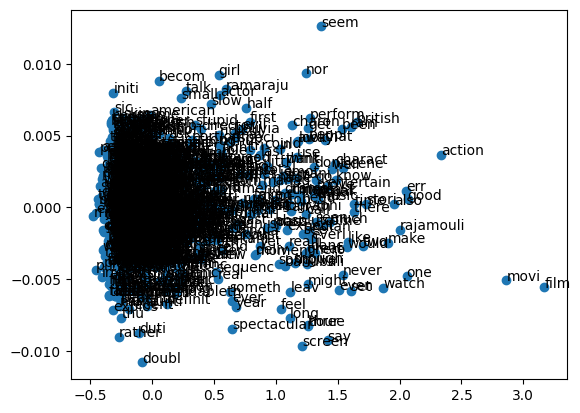

In [14]:
# Extracting word vectors from the Word2Vec model
X = model.wv[model.wv.index_to_key]

# Applying Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Creating a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

# Extracting words from the model's vocabulary
words = list(model.wv.index_to_key)

# Annotating the scatter plot with words
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

# Displaying the scatter plot
pyplot.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [1]:
# The GitHub link of your final csv file

# Link: https://github.com/MylavarapuSaketh/Saketh_INFO5731_Fall2023/blob/main/reviews_processed.csv



